<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/RNN/RNN_LSTM_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Building an RNN-LSTM model using tensorflow.
__________________________________________________
<br>
<br>
<font size=2>
Written by: Arjang Fahim<br>
Date: 10-5-2021
Updated: 4-10-2022
</font>

# Step 1: Installation and Setup


  Colab already installed tensorflow versions 1.x and 2.0,
  GPU and non GPU versions. <br>
  For more information please check: <br>
  https://colab.research.google.com/notebooks/tensorflow_version.ipynb

In [ ]:
# pip insrall tensorflow

In [2]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.8.0


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [5]:
# import dataset
from tensorflow.keras.datasets import mnist

In [6]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [9]:
x_train.min(), x_train.max()

(0, 255)

In [10]:
y_train.min(), y_train.max()

(0, 9)

In [11]:
# normalizing the dataset
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train.min(), x_train.max()

(0.0, 1.0)

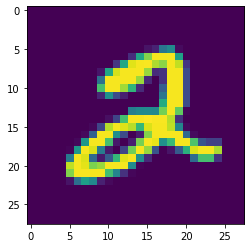

In [13]:
plt.imshow(x_train[5])

In [14]:
y_train[5]

2

# Step 3: Building the LSTM

In [19]:
# Define an keras model (RNN) object

model = tf.keras.models.Sequential()

In [20]:
# Adding first LSTM layer
# return_sequence : if we have dense layer after LSTM then the sequence 
#                   layer should be False

model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True, input_shape=(28,28)))
model.add(tf.keras.layers.Dropout(0.2))

# Adding second LSTM layer
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Adding fully connected layer (first dense layer)
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

# Output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 28, 128)           80384     
                                                                 
 dropout_2 (Dropout)         (None, 28, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [22]:
# Defining optimizer
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [23]:
# Compile the model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Step 4: Training the model

In [24]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 145s 76ms/step - loss: 0.5793 - accuracy: 0.8113 - val_loss: 0.1527 - val_accuracy: 0.9539
Epoch 2/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.1578 - accuracy: 0.9580 - val_loss: 0.0847 - val_accuracy: 0.9739
Epoch 3/10
1875/1875 [==============================] - 133s 71ms/step - loss: 0.1048 - accuracy: 0.9719 - val_loss: 0.0792 - val_accuracy: 0.9806
Epoch 4/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0837 - accuracy: 0.9780 - val_loss: 0.0714 - val_accuracy: 0.9828
Epoch 5/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0693 - accuracy: 0.9824 - val_loss: 0.0561 - val_accuracy: 0.9843
Epoch 6/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0598 - accuracy: 0.9847 - val_loss: 0.0439 - val_accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0504 - accuracy: 0.9864 - val_loss: 0

In [26]:
# Model prediction
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = -1)

In [27]:
# One example of prediction
print(y_pred[0], y_test[0])

7 7


In [28]:
# Another example
print(y_pred[10], y_test[10])

0 0


In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 977    0    0    0    0    1    1    1    0    0]
 [   0 1130    1    0    0    1    0    3    0    0]
 [   1    1 1023    2    0    0    0    4    1    0]
 [   0    0    3 1002    0    3    0    2    0    0]
 [   0    0    1    0  963    0    1    6    0   11]
 [   0    1    0    8    0  880    1    2    0    0]
 [   5    1    2    0    2    2  944    0    2    0]
 [   0    1    4    1    0    0    0 1019    0    3]
 [   0    0    5    2    0    2    2    5  953    5]
 [   2    0    0    0    6    1    0    5    1  994]]


In [30]:
acc_cm = accuracy_score(y_test, y_pred)

# Step 5: Learning curve

In [31]:
def learning_curve(history, epoch):
  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])

  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # training vs validation loss
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])

  plt.title('Model Accuracy')
  plt.ylabel('loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

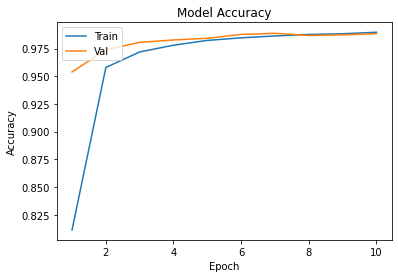

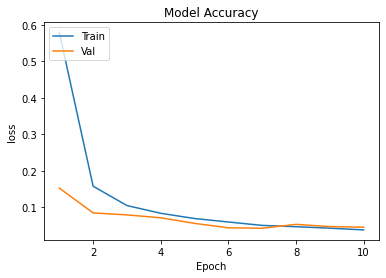

In [32]:
learning_curve(history, 10)